In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_iris  # Dataset para clasificación


In [3]:
# Para implementar la red neuronal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop


print("Versión de TensorFlow:", tf.__version__)


Versión de TensorFlow: 2.18.0


In [4]:
# Cargamos el conjunto de datos Iris
data = load_iris()
X = data.data  # Variables predictoras
y = data.target  # Etiquetas
feature_names = data.feature_names  # Nombres de características
target_names = data.target_names  # Nombres de clases

In [5]:
# Veamos las primeras filas de datos
print("Primeras 5 filas de datos:")
df = pd.DataFrame(X, columns=feature_names)
df['especie'] = [target_names[i] for i in y]
print(df.head())

Primeras 5 filas de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  especie  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [6]:
# Conteo de clases
print("\nDistribución de clases:")
for i, name in enumerate(target_names):
    print(f"{name}: {np.sum(y == i)} ejemplos")



Distribución de clases:
setosa: 50 ejemplos
versicolor: 50 ejemplos
virginica: 50 ejemplos


In [7]:
# Dividimos los datos en entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nDatos divididos: {X_train.shape[0]} ejemplos de entrenamiento, {X_test.shape[0]} ejemplos de prueba")



Datos divididos: 105 ejemplos de entrenamiento, 45 ejemplos de prueba


In [8]:
# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nDatos normalizados")


Datos normalizados


In [9]:
# Convertimos las etiquetas a formato one-hot
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print(f"Formato one-hot: {y_train_onehot.shape[1]} clases codificadas")

Formato one-hot: 3 clases codificadas


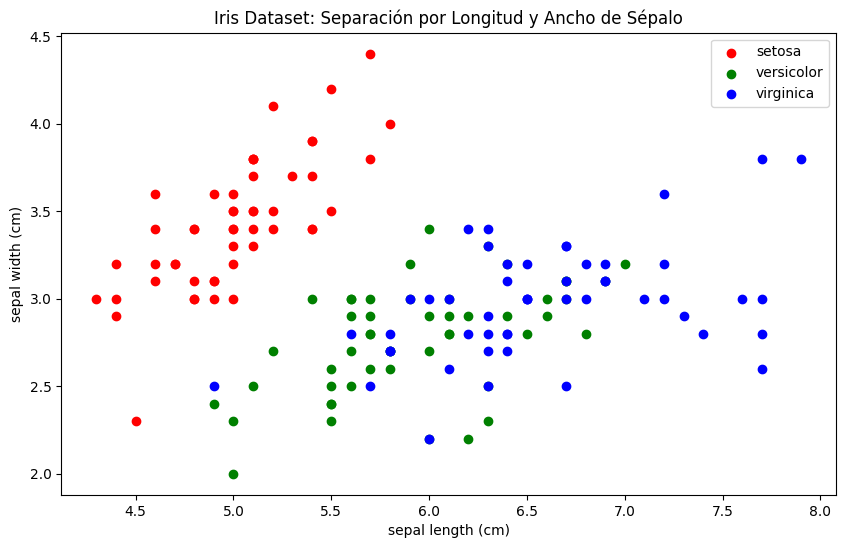

In [10]:
# Visualizamos las dos primeras características
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset: Separación por Longitud y Ancho de Sépalo')
plt.legend()
plt.show()

In [11]:
# Definimos un modelo secuencial
model = Sequential()

In [17]:
# Añadimos dos capas ocultas con 100 y 50 neuronas
model.add(Dense(100, activation='relu', input_shape=(4,)))
model.add(Dense(50, activation='relu', input_shape=(4,)))

In [19]:
# Añadimos una capa de salida con 3 neuronas (una por clase)
model.add(Dense(3, activation='softmax'))

In [20]:
# Mostramos la arquitectura del modelo
print("Arquitectura del modelo:")
model.summary()

Arquitectura del modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           153 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,075 (78.42 KB)

 Trainable params: 20,075 (78.42 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compilamos el modelo con optimizador Adam
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Modelo compilado con optimizador Adam")


Modelo compilado con optimizador Adam


In [22]:
# Entrenamos el modelo
history = model.fit(
    X_train_scaled, y_train_onehot,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.2847 - loss: 1.1201 - val_accuracy: 0.3333 - val_loss: 1.1083
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3390 - loss: 1.0746 - val_accuracy: 0.3333 - val_loss: 1.0437
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3118 - loss: 1.0141 - val_accuracy: 0.3333 - val_loss: 0.9376
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3483 - loss: 0.9317 - val_accuracy: 0.7619 - val_loss: 0.8495
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6105 - loss: 0.8785 - val_accuracy: 0.7619 - val_loss: 0.7638
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6280 - loss: 0.8142 - val_accuracy: 0.7619 - val_loss: 0.7178
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7978 - loss: 0.7350 - val_accuracy: 0.8095 - val_loss: 0.6945
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6737 - loss: 0.7234 - val_accuracy: 0.9048 - v


Pérdida en el conjunto de prueba: 0.4593
Precisión en el conjunto de prueba: 0.9111
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

Informe de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Matriz de Confusión:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


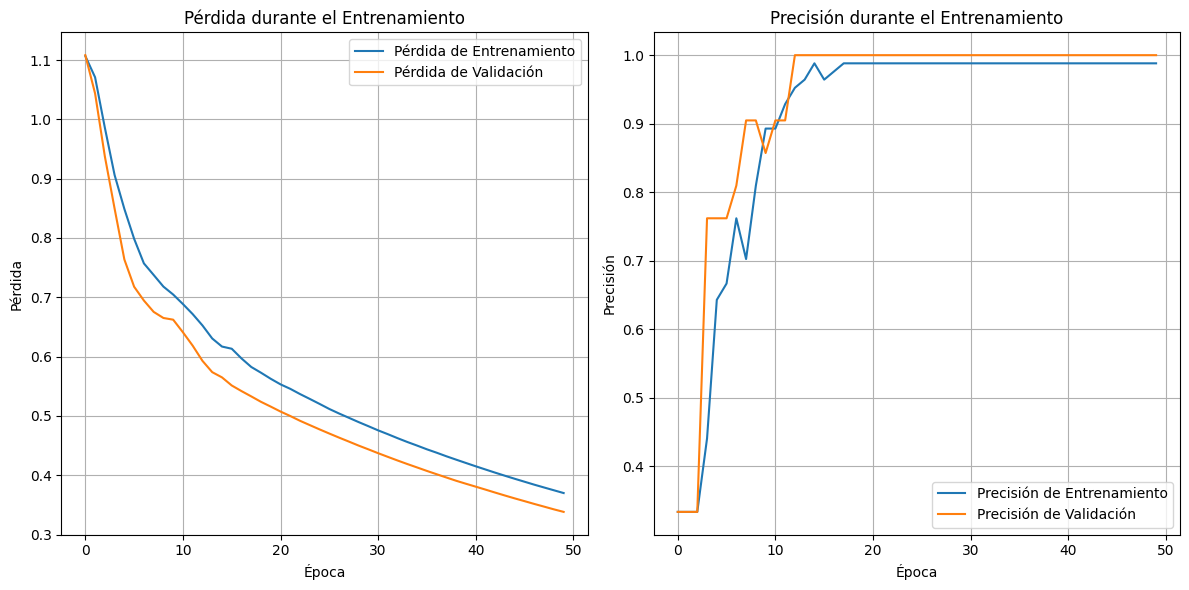

In [23]:
# Evaluamos el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test_onehot, verbose=0)
print(f'\nPérdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')

# Predicciones en el conjunto de prueba
y_pred_onehot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_onehot, axis=1)

# Informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)

# Gráfica del historial de entrenamiento
plt.figure(figsize=(12, 6))

# Gráfica de Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Gráfica de Precisión (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
# 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
nueva_flor_ejemplo = np.array([[5.1, 3.5, 1.4, 0.2]]) # Ejemplo de una Setosa

# Escalamos el nuevo ejemplo usando el mismo scaler que usamos para los datos de entrenamiento
nueva_flor_ejemplo_scaled = scaler.transform(nueva_flor_ejemplo)

# Hacemos la predicción con el modelo entrenado
prediccion_probabilidades = model.predict(nueva_flor_ejemplo_scaled)

# La predicción nos da las probabilidades para cada clase. Elegimos la clase con mayor probabilidad.
clase_predicha_indice = np.argmax(prediccion_probabilidades, axis=1)[0]
clase_predicha_nombre = target_names[clase_predicha_indice]

print(f"\nEjemplo de nueva flor: {nueva_flor_ejemplo[0]}")
print(f"Probabilidades de predicción para cada clase: {prediccion_probabilidades[0]}")
print(f"La clase predicha para esta flor es: {clase_predicha_nombre}")

# Podemos probar con otros ejemplos:
# Ejemplo de Versicolor
nueva_flor_ejemplo_2 = np.array([[6.0, 2.9, 4.5, 1.5]])
nueva_flor_ejemplo_scaled_2 = scaler.transform(nueva_flor_ejemplo_2)
prediccion_probabilidades_2 = model.predict(nueva_flor_ejemplo_scaled_2)
clase_predicha_indice_2 = np.argmax(prediccion_probabilidades_2, axis=1)[0]
clase_predicha_nombre_2 = target_names[clase_predicha_indice_2]

print(f"\nEjemplo de nueva flor 2: {nueva_flor_ejemplo_2[0]}")
print(f"Probabilidades de predicción para cada clase: {prediccion_probabilidades_2[0]}")
print(f"La clase predicha para esta flor es: {clase_predicha_nombre_2}")

# Ejemplo de Virginica
nueva_flor_ejemplo_3 = np.array([[6.7, 3.0, 5.2, 2.3]])
nueva_flor_ejemplo_scaled_3 = scaler.transform(nueva_flor_ejemplo_3)
prediccion_probabilidades_3 = model.predict(nueva_flor_ejemplo_scaled_3)
clase_predicha_indice_3 = np.argmax(prediccion_probabilidades_3, axis=1)[0]
clase_predicha_nombre_3 = target_names[clase_predicha_indice_3]

print(f"\nEjemplo de nueva flor 3: {nueva_flor_ejemplo_3[0]}")
print(f"Probabilidades de predicción para cada clase: {prediccion_probabilidades_3[0]}")
print(f"La clase predicha para esta flor es: {clase_predicha_nombre_3}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Ejemplo de nueva flor: [5.1 3.5 1.4 0.2]
Probabilidades de predicción para cada clase: [0.7582015  0.07210352 0.16969498]
La clase predicha para esta flor es: setosa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Ejemplo de nueva flor 2: [6.  2.9 4.5 1.5]
Probabilidades de predicción para cada clase: [0.09092677 0.72198725 0.18708597]
La clase predicha para esta flor es: versicolor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Ejemplo de nueva flor 3: [6.7 3.  5.2 2.3]
Probabilidades de predicción para cada clase: [0.21352126 0.14670861 0.6397701 ]
La clase predicha para esta flor es: virginica
